In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Text Minning

In [2]:
#!pip insall tweepy - install tweepy with pip
#conda install -c conda-forge tweepy --> install tweepy for anaconda
# conda install -c conda-forge/label/cf201901 tweepy --> install tweepy for anaconda
import tweepy, codecs


consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
tweets = api.search(q = "#datascience", lang = "en", count = 5000)

In [4]:
import pandas as pd
def hashtag_df(tweets):
    id_list = [tweet.id for tweet  in tweets]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweets]
    df["created_at"] = [tweet.created_at for tweet in tweets]
    df["retweeted"] = [tweet.retweeted for tweet in tweets]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets]
    df["source"] = [tweet.source for tweet in tweets]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweets]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweets]
    df["user_location"] = [tweet.author.location for tweet in tweets]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweets]
    
    return df

In [5]:
df = hashtag_df(tweets)

In [6]:
df = hashtag_df(tweets)

#convert all letters to the same size (large, small transformation)
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

#sremoving numbers
df['text'] = df['text'].str.replace('\d','')

#stopwords
#conda install -c anaconda nltk  --> for anaconda
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
#conda install -c conda-forge textblob  --> for anaconda
from textblob import Word
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#npunctuations
df['text'] = df['text'].str.replace('rt','')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmeterdogan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmeterdogan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df["text"]

0     check gig fiverr design responsive wordpress w...
1      mbilaldev check gig fiverr develop stunning r...
2     check gig fiverr develop stunning react ui htt...
3      gp_pulipaka machine learning work bigdata ana...
4      gp_pulipaka machine learning work bigdata ana...
                            ...                        
95     rweekly_live new rquery december winvectorllc...
96     gp_pulipaka sparse convnets efficient inferen...
97     gp_pulipaka tensorflow implementation deep sp...
98     kirkdborne page pdf datascience cheat sheet c...
99     kirkdborne page pdf datascience cheat sheet c...
Name: text, Length: 100, dtype: object

In [8]:
freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()

In [9]:
freq_df.columns = ["words","frequencies"]

In [10]:
freq_df.shape

(367, 2)

In [11]:
freq_df[freq_df.frequencies > freq_df.frequencies.mean() + 
        freq_df.frequencies.std()]

,words,frequencies
19,,83.0
22,iot,19.0
23,python,19.0
24,iiot,19.0
25,machinelearning,29.0
26,analytics,47.0
27,gp_pulipaka,44.0
28,rstats,13.0
29,machine,24.0
31,bigdata,53.0


In [12]:
keywords = freq_df[freq_df.frequencies > freq_df.frequencies.mean() + 
        freq_df.frequencies.std()]

In [13]:
keywords.plot.bar(x = "words",y = "frequencies");

## Word Cloud

In [14]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
#conda install -c conda-forge wordcloud --> for anaconda
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [15]:
text = " ".join(i for i in df.text)

In [ ]:
text

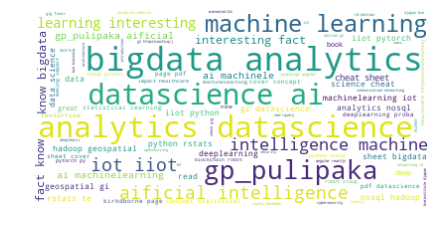

In [17]:
wordcloud = WordCloud(background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [65]:
image_mask = np.array(Image.open("network.jpg"))

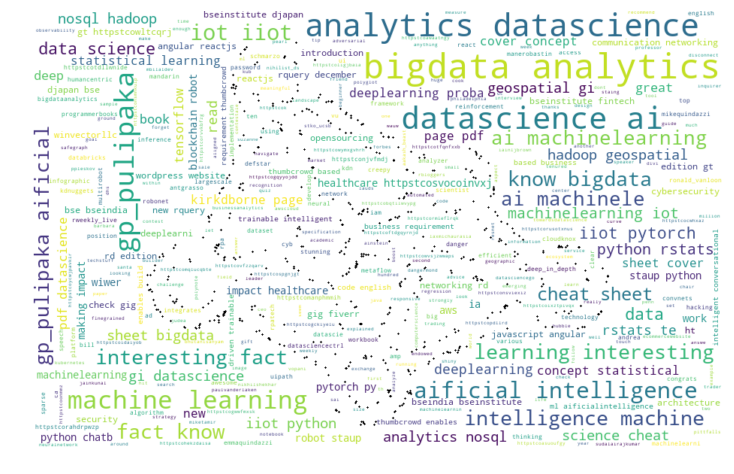

In [66]:
wc = WordCloud(background_color = "white", 
               max_words = 1000, 
               mask = image_mask,
              contour_width = 3)

wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()